In [73]:
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from zipfile import ZipFile
  

with ZipFile("Datasets/im.db.zip", 'r') as zObject:
    zObject.extractall(
        path="IMDB/")

conn = sqlite3.connect("IMDB/im.db")
cur = conn.cursor()
imdb= pd.read_sql('''
    SELECT * 
    FROM persons;

''', conn)
imdb.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [75]:
data =  """
SELECT *
FROM movie_ratings AS "mr" 
LEFT JOIN movie_basics AS "m"
    ON m.movie_ID=mr.movie_ID

"""
df = pd.read_sql(data, conn)
df.head(3)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama


In [76]:
# Cleaning the data

movie = df.dropna()
movie.isna().sum()
movie['genres'] = movie["genres"].apply(lambda word: word.split(",")[0]);
movie.head()

<ipython-input-76-648d0f0b5a4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genres'] = movie["genres"].apply(lambda word: word.split(",")[0]);


,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,Mystery


**Recommendation: Ratings and Genres

Invest in the Documentary, Drama and Comedy genres, it is amongst the most popular generes and has the highest average rating

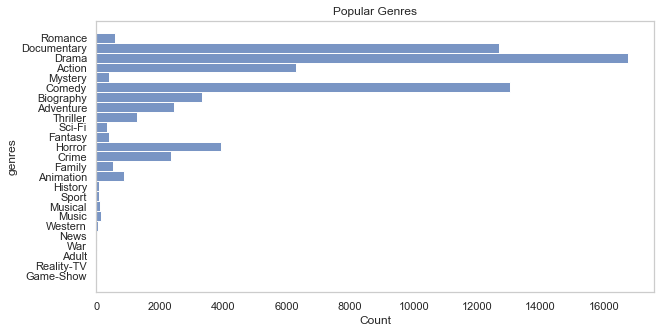

In [77]:
fig, ax = plt.subplots(figsize=(10,5))
g = sns.histplot(data=movie, y=movie['genres'])
#order= ["Drama", "Comedy", "Documentary", "Action", 'Horror', "Biography", "Adventure", "Crime", "Thriller", "Animation",
 #       "Romance", "Family", "Mystery", "Fantasy", "Sci-fi", "Music", 
  #      "Musical", "History", "Sport", "War", "News", "Adult", "Reality TV", "Game-Show"]
ax.set_title("Popular Genres") 
ax_ylabel=("Genres")
plt.grid(False)
# Color top 5 genres or arrange in accending order???
#then look for their ratings to make recommendation

#Drama, Documentary, Comedy, Action and Horror

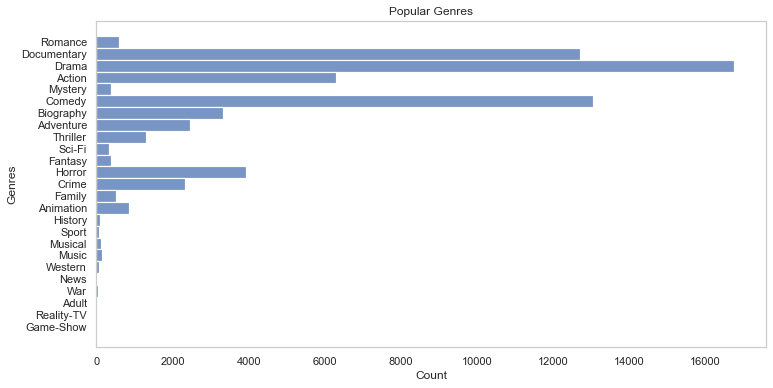

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=movie, y=movie['genres'])

plt.grid(False)

ax.set(xlabel="Count", ylabel="Genres")
ax.set_title("Popular Genres"); 


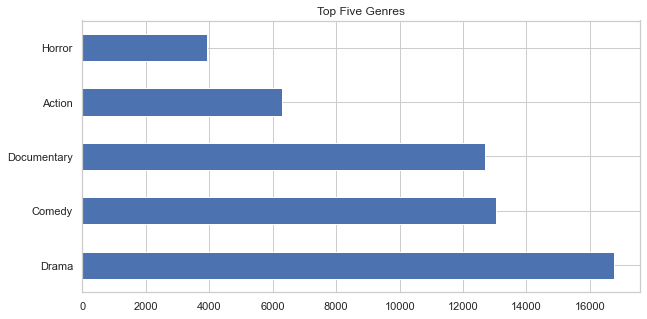

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax = movie["genres"].value_counts(ascending= False)[:5].plot(kind = 'barh')
ax.set_title("Top Five Genres")
ax.set_xlabel=("Counts") 
ax_ylabel=("Genres");

**Now that we know the top five genres, let's look at the top 5 genres produced and deduce which of the genres has the highest rating

In [80]:
top_5 = ["Drama", "Comedy", "Documentary", "Action","Horror"]
mv_new = movie[movie.genres.isin(top_5)]
mv_new.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action
5,tt1069246,6.2,326,tt1069246,Habana Eva,Habana Eva,2010,106.0,Comedy
7,tt1130982,6.4,571,tt1130982,The Night Clerk,Avant l'aube,2011,104.0,Drama


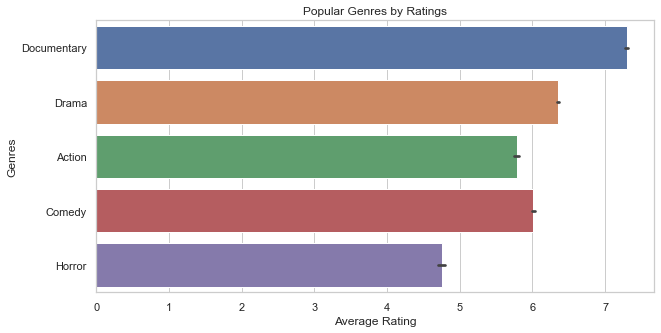

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.color_palette("flare", as_cmap=True)
sns.barplot(data=mv_new, x="averagerating", y="genres")
ax.set(xlabel="Average Rating", ylabel="Genres")
ax.set_title("Popular Genres by Ratings"); 

# How can I group this in accending order? The "order" feature in seaborns bargraph is not working for it

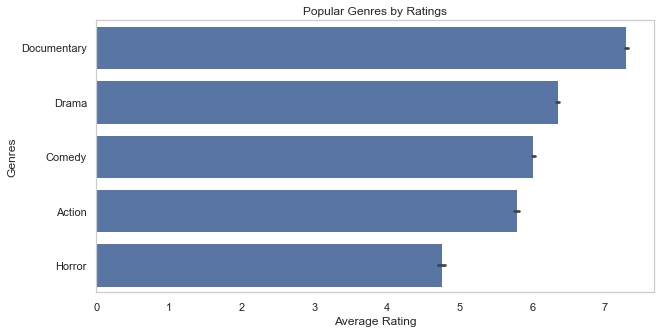

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("deep", len(mv_new))
g.axvline(x = 5, color = "black")
plt.grid(False)
order= ["Documentary", "Drama", "Comedy", "Action", 'Horror']
g=sns.barplot(data=mv_new, x="averagerating", y="genres", order = order, palette=np.array(pal[::100]))
ax.set(xlabel="Average Rating", ylabel="Genres")
ax.set_title("Popular Genres by Ratings"); 

** As shown above, the most rated popular genre is Documentary, Drama and Comedy